# Challenge 2

In this challenge we will continue working with `Pokemon.csv`. We will attempt solving a slightly more complex problem in which we will practice the iterative data analysis process you leaned in [this video](https://www.youtube.com/watch?v=xOomNicqbkk).

The problem statement is as follows:

**You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemons are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either `Type 1` or `Type 2`. Which type should you choose in order to maximize your chance of receiving a good Pokemon?**

To remind you about the 3 steps of iterative data analysis, they are:

1. Setting Expectations
1. Collecting Information
1. Reacting to Data / Revising Expectations

Following the iterative process, we'll guide you in completing the challenge.

## Provlem Solving Iteration 1

In this iteration we'll analyze the problem and identify the breakthrough. The original question statement is kind of vague because we don't know what a *good pokemon* really means as represented in the data. We'll start by understanding the dataset and see if we can find some insights.

In [1]:
# import libraries
import numpy as np
import pandas as pd

In [2]:
# importing the dataset and inspect the first few rows of the data
pokemon = pd.read_csv('Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

#### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemons?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

In [9]:
# your code here
pokemon['Total_new'] = pokemon.loc[:,'HP':'Speed'].sum(axis=1)
pokemon['Total_new']

pokemon['Total_new'] == pokemon['Total']

0      True
1      True
2      True
3      True
4      True
       ... 
795    True
796    True
797    True
798    True
799    True
Length: 800, dtype: bool

## Provlem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](one-hot-encoding.png)

In [81]:
encoded_type = pd.get_dummies(pokemon['Type 1']) + pd.get_dummies(pokemon['Type 2'])
encoded_type

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
796,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
797,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
798,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# your code here
#from sklearn.preprocessing import OneHotEncoder as enc
#enc.fit()

In [82]:
pokemon_full = pd.concat([pokemon, encoded_type], axis=1)
pokemon_full

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0,1,0,0,0,1,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0,1,0,0,0,1,0,0,0,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0,1,0,0,0,1,0,0,0,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0,1,0,0,0,1,0,0,0,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,0,0,0,0,0,0,0,1,0,0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,0,0,0,0,0,0,0,1,0,0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,1,0,0,0,0,0,1,0,0,0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,0,0,0,0,0,0,1,0,0,0


## Provlem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between `Total` and the encoded fields. Our expectation is:

#### There are relationships between `Total` and the encoded pokemon type variables and we need to identify the correlations.

The information we need to collect is:

#### How to identify the relationship between `Total` and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of `Total` to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest `Total`.

In [83]:
# your code here
pokemon_full.loc[:,'Bug':'Water'] = pokemon_full.loc[:,'Bug':'Water'].astype('bool')

In [84]:
pokemon_full.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
Total_new      int64
Bug             bool
Dark            bool
Dragon          bool
Electric        bool
Fairy           bool
Fighting        bool
Fire            bool
Flying          bool
Ghost           bool
Grass           bool
Ground          bool
Ice             bool
Normal          bool
Poison          bool
Psychic         bool
Rock            bool
Steel           bool
Water           bool
dtype: object

In [85]:
pokemon_full.loc[:,'Total_new':].corr().iloc[:,0].sort_values(ascending = False)

Total_new    1.000000
Dragon       0.229705
Psychic      0.124688
Steel        0.109703
Fire         0.078726
Fighting     0.077786
Ice          0.060248
Flying       0.059383
Dark         0.056154
Rock         0.032731
Electric     0.020971
Ground       0.015060
Ghost        0.003641
Water       -0.021665
Fairy       -0.036698
Grass       -0.052592
Poison      -0.090441
Normal      -0.105331
Bug         -0.145781
Name: Total_new, dtype: float64

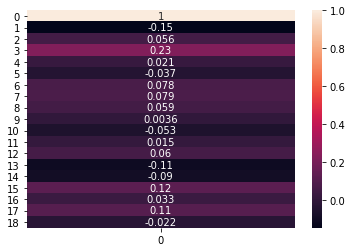

In [101]:
import seaborn as sn
import matplotlib.pyplot as plt

corr = pokemon_full.loc[:,'Total_new':].corr().iloc[:,0]
corr = np.asarray(corr).reshape(19,1)
sn.heatmap(corr, annot=True)
plt.show()

In [87]:
pokemon_full.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396,...,0.170270,0.042845,-0.046411,0.072143,-0.054071,-0.217015,0.003396,0.025601,0.094215,-0.101662
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758,...,0.003641,-0.052592,0.015060,0.060248,-0.105331,-0.090441,0.124688,0.032731,0.109703,-0.021665
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620,...,-0.062262,-0.046120,0.074916,0.082021,0.111999,-0.075668,0.027239,-0.035514,-0.043037,0.029906
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408,...,-0.015735,-0.062674,0.127416,0.021007,-0.074769,-0.073370,-0.069773,0.101043,0.107505,-0.070578
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377,...,0.060864,-0.006948,0.134451,0.020174,-0.174609,-0.093942,0.010685,0.298242,0.350559,0.006259
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907,...,0.035184,0.001312,-0.107346,0.070236,-0.184013,-0.043722,0.237125,-0.106214,-0.005608,0.025885
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937,...,0.044885,-0.005243,-0.076820,0.060370,-0.112124,-0.046722,0.190286,0.019179,0.103424,-0.024765
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715,...,-0.060599,-0.095578,-0.095803,-0.005371,0.052224,-0.030134,0.108020,-0.165331,-0.098291,-0.049030
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794,...,0.155587,0.072716,-0.050801,0.037865,-0.036168,-0.191679,-0.021772,0.009356,0.078924,-0.104981
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000,...,-0.014494,-0.066736,-0.007329,0.041136,-0.086246,-0.086195,0.169224,-0.012571,0.019437,-0.065781


# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

In [90]:
# your code here
pokemon_full.groupby('Type 1')['Total'].mean().sort_values(ascending = False)

Type 1
Dragon      550.531250
Steel       487.703704
Flying      485.000000
Psychic     475.947368
Fire        458.076923
Rock        453.750000
Dark        445.741935
Electric    443.409091
Ghost       439.562500
Ground      437.500000
Ice         433.458333
Water       430.455357
Grass       421.142857
Fighting    416.444444
Fairy       413.176471
Normal      401.683673
Poison      399.142857
Bug         378.927536
Name: Total, dtype: float64

<AxesSubplot:xlabel='Type 1', ylabel='Total'>

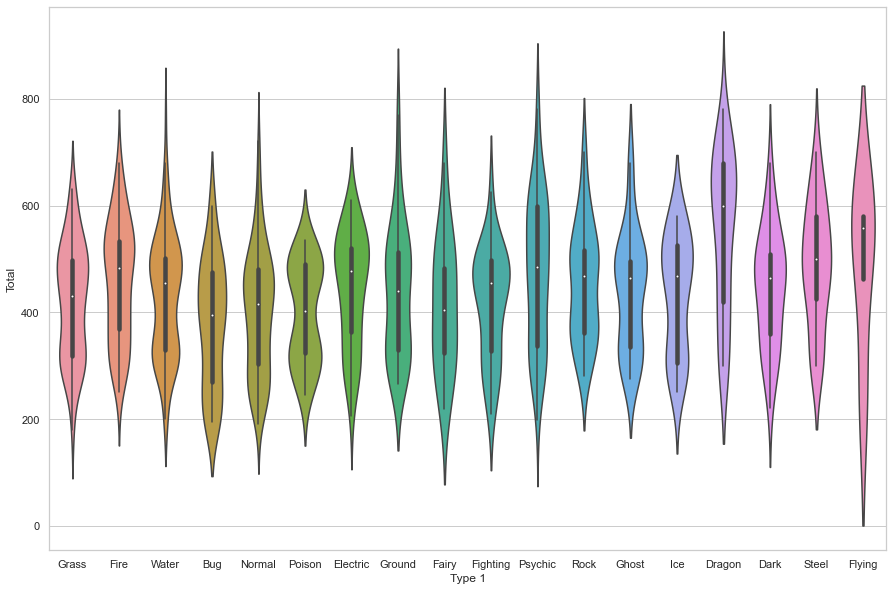

In [114]:
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(15,10))
sns.violinplot(x='Type 1', y='Total', data=pokemon)

In [ ]:
pokemon_full['Total exp'] = np.exp(pokemon_full['Total'], 3)

In [118]:
# your code here
pokemon_full.groupby('Type 2')['Total'].mean().sort_values(ascending = False)

Type 2
Dragon      526.166667
Fighting    525.846154
Ice         525.714286
Fire        506.250000
Steel       485.227273
Dark        484.400000
Psychic     479.060606
Electric    455.333333
Flying      452.546392
Ground      444.342857
Rock        434.642857
Ghost       430.714286
Water       418.214286
Fairy       417.956522
Normal      411.500000
Grass       408.920000
Poison      396.500000
Bug         393.333333
Name: Total, dtype: float64

<AxesSubplot:xlabel='Type 2', ylabel='Total'>

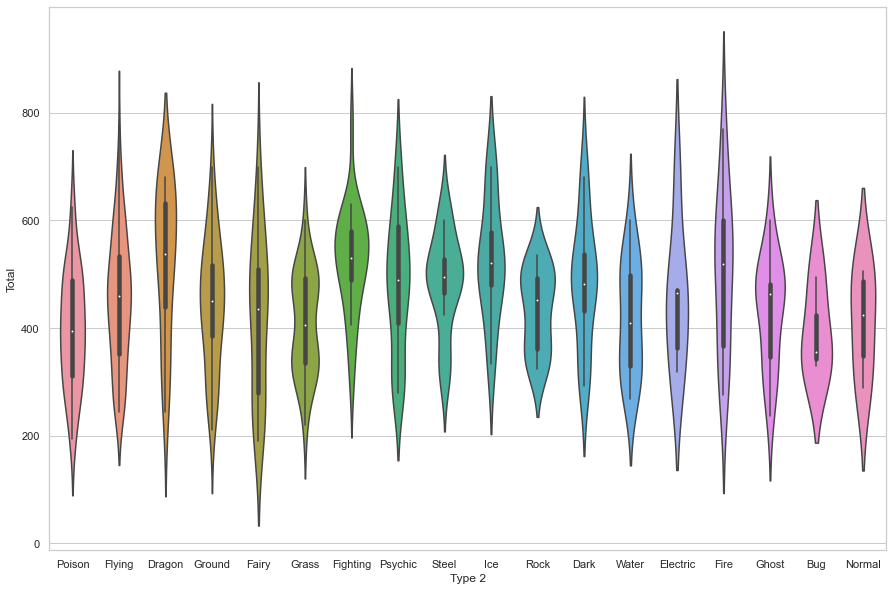

In [119]:
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(15,10))
sns.violinplot(x='Type 2', y='Total', data=pokemon)